In [37]:
# Step 1: Install Required Libraries (if not already installed)
!pip install tensorflow keras numpy matplotlib opencv-python split-folders

# Step 2: Import Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import splitfolders  # For splitting data into train and val folders

In [39]:
# Step 3: Define Paths
dataset_dir = '/kaggle/input/dataset'  # Replace with your dataset path
data_dir = os.path.join(dataset_dir, 'data')  # Path to the data folder
output_dir = '/kaggle/working/split_data'  # Output folder for train/val split (writable directory)

# Step 4: Split Data into Train and Validation Sets
# Create train and val folders if they don't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Split the data into train (80%) and val (20%)
splitfolders.ratio(data_dir, output=output_dir, seed=42, ratio=(0.8, 0.2))


Copying files: 7553 files [00:39, 193.61 files/s]


In [41]:
# Update paths for train and val directories
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

In [42]:
# Step 5: Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 input size
    batch_size=32,
    class_mode='binary'  # Binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 6042 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.


In [43]:
# Step 6: Build the Model Using VGG16
# Load VGG16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Build the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [44]:
# Step 7: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10  # Adjust as needed
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 47/188 ━━━━━━━━━━━━━━━━━━━━ 47s 334ms/step - accuracy: 0.6723 - loss: 1.9255

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 96s 417ms/step - accuracy: 0.7896 - loss: 1.0175 - val_accuracy: 0.9661 - val_loss: 0.0931
Epoch 2/10
  1/188 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.9688 - loss: 0.1294

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9688 - loss: 0.1294 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 70s 357ms/step - accuracy: 0.9256 - loss: 0.1864 - val_accuracy: 0.9721 - val_loss: 0.0778
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.9688 - loss: 0.1176 - val_accuracy: 1.0000 - val_loss: 2.4009e-04
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 71s 362ms/step - accuracy: 0.9440 - loss: 0.1424 - val_accuracy: 0.9707 - val_loss: 0.0796
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.9688 - loss: 0.0703 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 70s 362ms/step - accuracy: 0.9382 - loss: 0.1550 - val_accuracy: 0.9747 - val_loss: 0.0693
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 1.0000 - loss: 0.0457 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 71s 363ms/step - accuracy: 0.9434 - loss: 0.1385 - val_

48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.9690 - loss: 0.0786
Validation Loss: 0.07157871872186661
Validation Accuracy: 0.9722038507461548


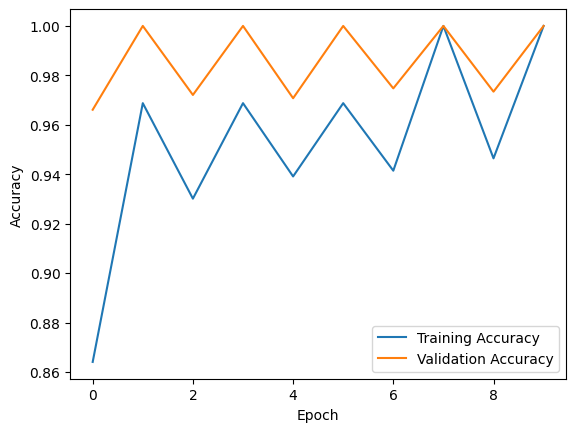

In [45]:
# Step 8: Evaluate the Model
# Evaluate on validation data
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# Step 9: Save the Model
model.save('/kaggle/working/face_mask_detection_vgg16.h5')  # Save to writable directory

In [62]:
# Step 10: Test the Model on New Images
import cv2

# Load an image for testing
image_path = '/kaggle/input/dataset/data/without_mask/without_mask_100.jpg'  # Replace with your test image path
#image_path = '/kaggle/working/test_image.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = image / 255.0  # Normalize

# Predict
prediction = model.predict(image)
if prediction[0] > 0.5:
    print("No Mask Detected")
else:
    print("Mask Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Mask Detected


In [60]:
import os

working_dir = "/kaggle/working/"  # Or any other path you want to inspect

# List all files and directories
items = os.listdir(working_dir)
for item in items:
    print(item)

# List only files
files = [item for item in items if os.path.isfile(os.path.join(working_dir, item))]
print("\nFiles:")
for file in files:
    print(file)

# List only directories
dirs = [item for item in items if os.path.isdir(os.path.join(working_dir, item))]
print("\nDirectories:")
for dir in dirs:
    print(dir)

face_mask_detection_vgg16.h5
.virtual_documents
val
train
test_image.jpg
split_data

Files:
face_mask_detection_vgg16.h5
test_image.jpg

Directories:
.virtual_documents
val
train
split_data
